In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np ## importing necessary libraries

In [2]:
df=pd.read_csv('7817_1.csv')

In [3]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [4]:
df.isna().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [5]:
df.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.443135e+11,83.584444,4.359388,NaN,NaN,NaN,8.443135e+11
std,3.416444e+09,197.150238,1.021445,NaN,NaN,NaN,3.416444e+09
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11
75%,8.487190e+11,34.000000,5.000000,NaN,NaN,NaN,8.487190e+11
max,8.487190e+11,997.000000,5.000000,NaN,NaN,NaN,8.487190e+11


In [6]:
import warnings
warnings.filterwarnings('ignore')

## Cleaning text

In [7]:
# Import necessary libraries
import pandas as pd
import re


# Select only the required columns
df = df[["reviews.text", "reviews.rating"]]

# Convert text to lowercase
df["reviews.text"] = df["reviews.text"].str.lower()

# Define a function to clean the text
def clean_text(text):
    # Use regular expressions to remove mentions, hashtags, special characters, URLs, and numbers
    cleaned_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])", " ", text).split())
    return cleaned_text

# Apply the clean_text function to the 'reviews.text' column
df["reviews.text"] = df["reviews.text"].apply(clean_text)

# Display the modified DataFrame
df.head()


,reviews.text,reviews.rating
0,i initially had trouble deciding between the p...,5.0
1,allow me to preface this with a little history...,5.0
2,i am enjoying it so far great for reading had ...,4.0
3,i bought one of the first paperwhites and have...,5.0
4,i have to say upfront i don t like coroporate ...,5.0


## Tokenization and Stemming

In [8]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# Import necessary libraries from nltk for text preprocessing
import nltk

# Import word_tokenize to tokenize the text
from nltk.tokenize import word_tokenize

# Convert 'reviews.text' to lowercase
df["reviews.text"] = df["reviews.text"].str.lower()

# Tokenize the text using NLTK
df["reviews.text"] = df["reviews.text"].apply(word_tokenize)

# Define a function to perform stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the tokenized text
df["reviews.text"] = df["reviews.text"].apply(stem_text)

# Display the modified DataFrame
df.head()


,reviews.text,reviews.rating
0,"[i, initi, had, troubl, decid, between, the, p...",5.0
1,"[allow, me, to, prefac, thi, with, a, littl, h...",5.0
2,"[i, am, enjoy, it, so, far, great, for, read, ...",4.0
3,"[i, bought, one, of, the, first, paperwhit, an...",5.0
4,"[i, have, to, say, upfront, i, don, t, like, c...",5.0


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Analysis

In [10]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment category
def get_sentiment_category(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and get sentiment category
df['sentiment_score'] = df['reviews.text'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Display the modified DataFrame
df[['reviews.text', 'sentiment_category']].head()


,reviews.text,sentiment_category
0,"[i, initi, had, troubl, decid, between, the, p...",positive
1,"[allow, me, to, prefac, thi, with, a, littl, h...",positive
2,"[i, am, enjoy, it, so, far, great, for, read, ...",positive
3,"[i, bought, one, of, the, first, paperwhit, an...",positive
4,"[i, have, to, say, upfront, i, don, t, like, c...",positive


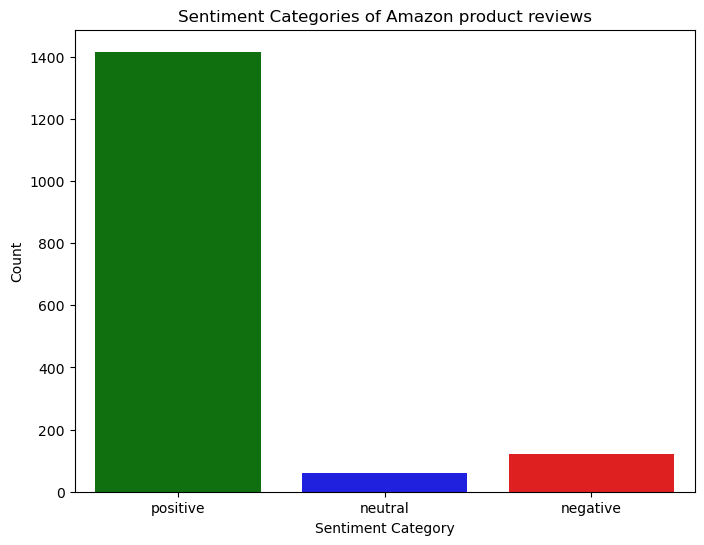

In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'amazonreviews' is your DataFrame

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment category
def get_sentiment_category(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and get sentiment category
df['sentiment_score'] = df['reviews.text'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
plt.title('Sentiment Categories of Amazon product reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


In [12]:
# Print the number of positive sentiment tweets
print("Number of Positive Sentiment Tweets:", df['sentiment_category'].value_counts()['positive'])

# Print the number of neutral sentiment tweets
print("Number of Neutral Sentiment Tweets:", df['sentiment_category'].value_counts()['neutral'])

# Print the number of negative sentiment tweets
print("Number of Negative Sentiment Tweets:", df['sentiment_category'].value_counts()['negative'])

Number of Positive Sentiment Tweets: 1416
Number of Neutral Sentiment Tweets: 60
Number of Negative Sentiment Tweets: 121


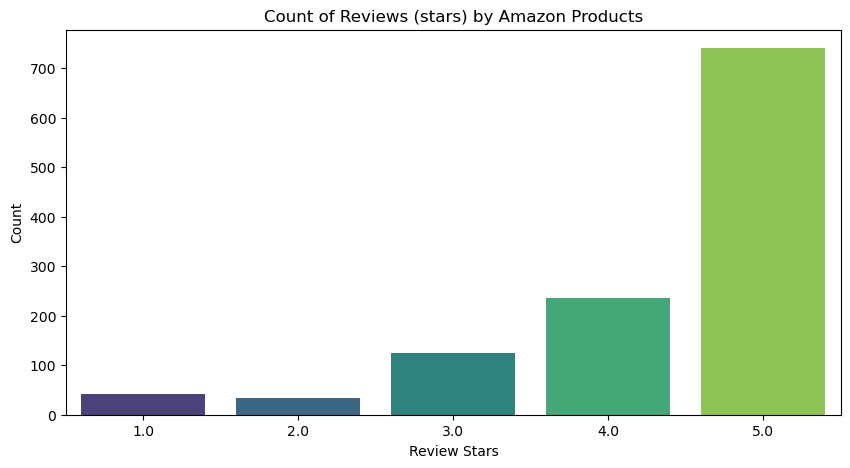

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of reviews by stars
stars_count = df['reviews.rating'].value_counts().sort_index()

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x=stars_count.index, y=stars_count.values, palette='viridis')

# Customize the plot
plt.title('Count of Reviews (stars) by Amazon Products')
plt.xlabel('Review Stars')
plt.ylabel('Count')

# Show the plot
plt.show()


## Word Cloud

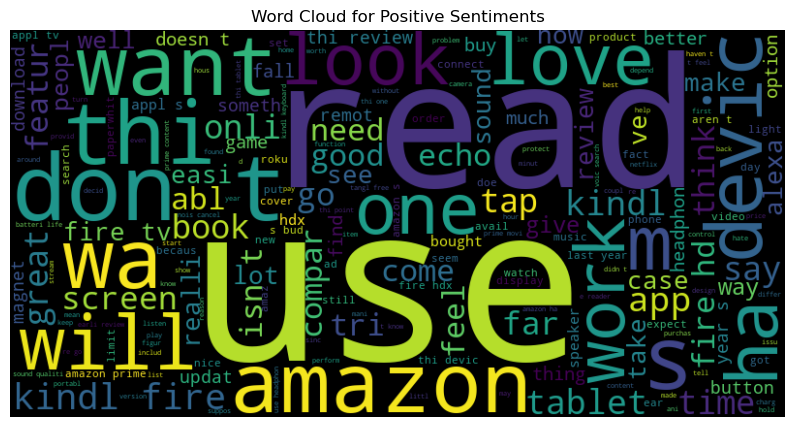

In [14]:
from wordcloud import WordCloud

# Apply sentiment analysis and get sentiment category
df['sentiment_score'] = df['reviews.text'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Filter reviews with positive sentiment
positive_reviews = df[df['sentiment_category'] == 'positive']

# Concatenate all positive reviews into a single string
positive_text = ' '.join(positive_reviews['reviews.text'].apply(' '.join))

# Generate a word cloud for positive sentiments
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

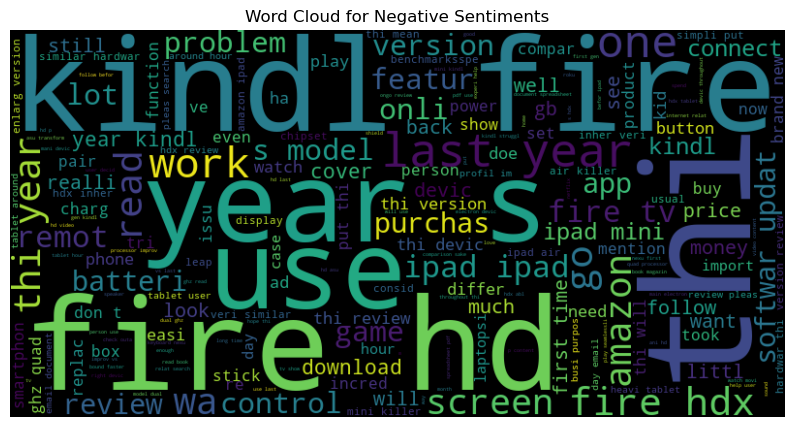

In [15]:
# Filter reviews with positive sentiment
negative_reviews = df[df['sentiment_category'] == 'negative']

# Concatenate all positive reviews into a single string
positive_text = ' '.join(negative_reviews['reviews.text'].apply(' '.join))

# Generate a word cloud for positive sentiments
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

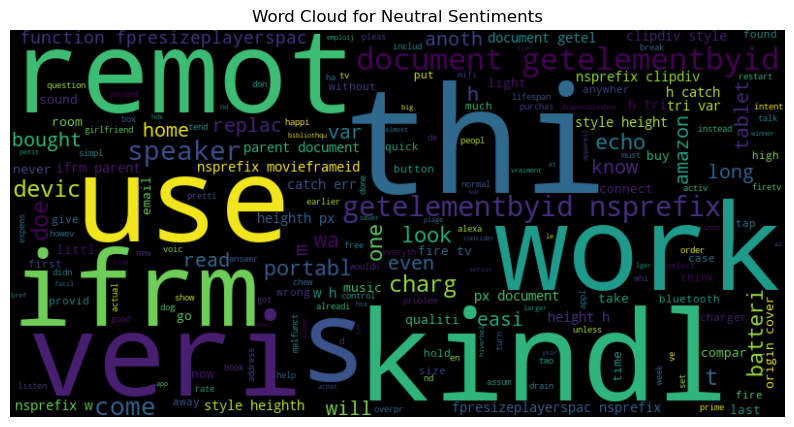

In [16]:
# Filter reviews with positive sentiment
neutral_reviews = df[df['sentiment_category'] == 'neutral']

# Concatenate all positive reviews into a single string
positive_text = ' '.join(neutral_reviews['reviews.text'].apply(' '.join))

# Generate a word cloud for positive sentiments
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

In [17]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


## LDA Topic Modelling

In [18]:
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Step 1: Preprocess the text data for LDA
def preprocess_text_for_lda(text):
    # Tokenize the text and remove punctuation
    return [token for token in simple_preprocess(text) if token.isalpha()]

# Filter the DataFrame to include only positive sentiment
positive_sentiment_df = df[df['sentiment_category'] == 'positive']

# Apply preprocessing to the 'content' column for positive sentiment
positive_sentiment_df['processed_text'] = positive_sentiment_df['reviews.text'].astype(str).apply(preprocess_text_for_lda)

# Step 2: Create a Dictionary and Corpus for LDA
# Create a dictionary from the preprocessed text data
lda_dictionary = Dictionary(positive_sentiment_df['processed_text'])

# Filter out words that occur in less than 5 documents and more than 70% of the documents
lda_dictionary.filter_extremes(no_below=5, no_above=0.7)

# Create a corpus (bag of words representation) using the dictionary
lda_corpus = [lda_dictionary.doc2bow(text) for text in positive_sentiment_df['processed_text']]

# Step 3: Train the LDA Model
topics = 4  # You can adjust the number of topics according to your preference
lda_model = LdaModel(corpus=lda_corpus, id2word=lda_dictionary, num_topics=topics, passes=10, random_state=42)

# Step 4: Print the Topics
for topic_num, topic_words in lda_model.print_topics():
    print(f'Topic {topic_num}: {topic_words}\n')

# Step 5: Calculate Coherence Score (Optional)
coherence_model = CoherenceModel(model=lda_model, texts=positive_sentiment_df['processed_text'], dictionary=lda_dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score for Positive Sentiment: {coherence_score}')

Topic 0: 0.027*"is" + 0.022*"you" + 0.021*"thi" + 0.019*"for" + 0.017*"of" + 0.013*"that" + 0.012*"on" + 0.011*"with" + 0.011*"my" + 0.011*"have"

Topic 1: 0.022*"is" + 0.021*"for" + 0.017*"you" + 0.015*"have" + 0.014*"prime" + 0.013*"thi" + 0.011*"of" + 0.011*"with" + 0.011*"on" + 0.011*"want"

Topic 2: 0.022*"is" + 0.021*"of" + 0.017*"in" + 0.017*"for" + 0.016*"kindl" + 0.013*"my" + 0.012*"that" + 0.012*"you" + 0.012*"have" + 0.011*"but"

Topic 3: 0.026*"they" + 0.020*"that" + 0.020*"of" + 0.019*"are" + 0.016*"as" + 0.014*"headphon" + 0.014*"my" + 0.014*"but" + 0.013*"like" + 0.012*"more"

Coherence Score for Positive Sentiment: 0.3163988404471131


In [20]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(lda_model, lda_corpus, lda_dictionary)
pyLDAvis.display(lda_display)

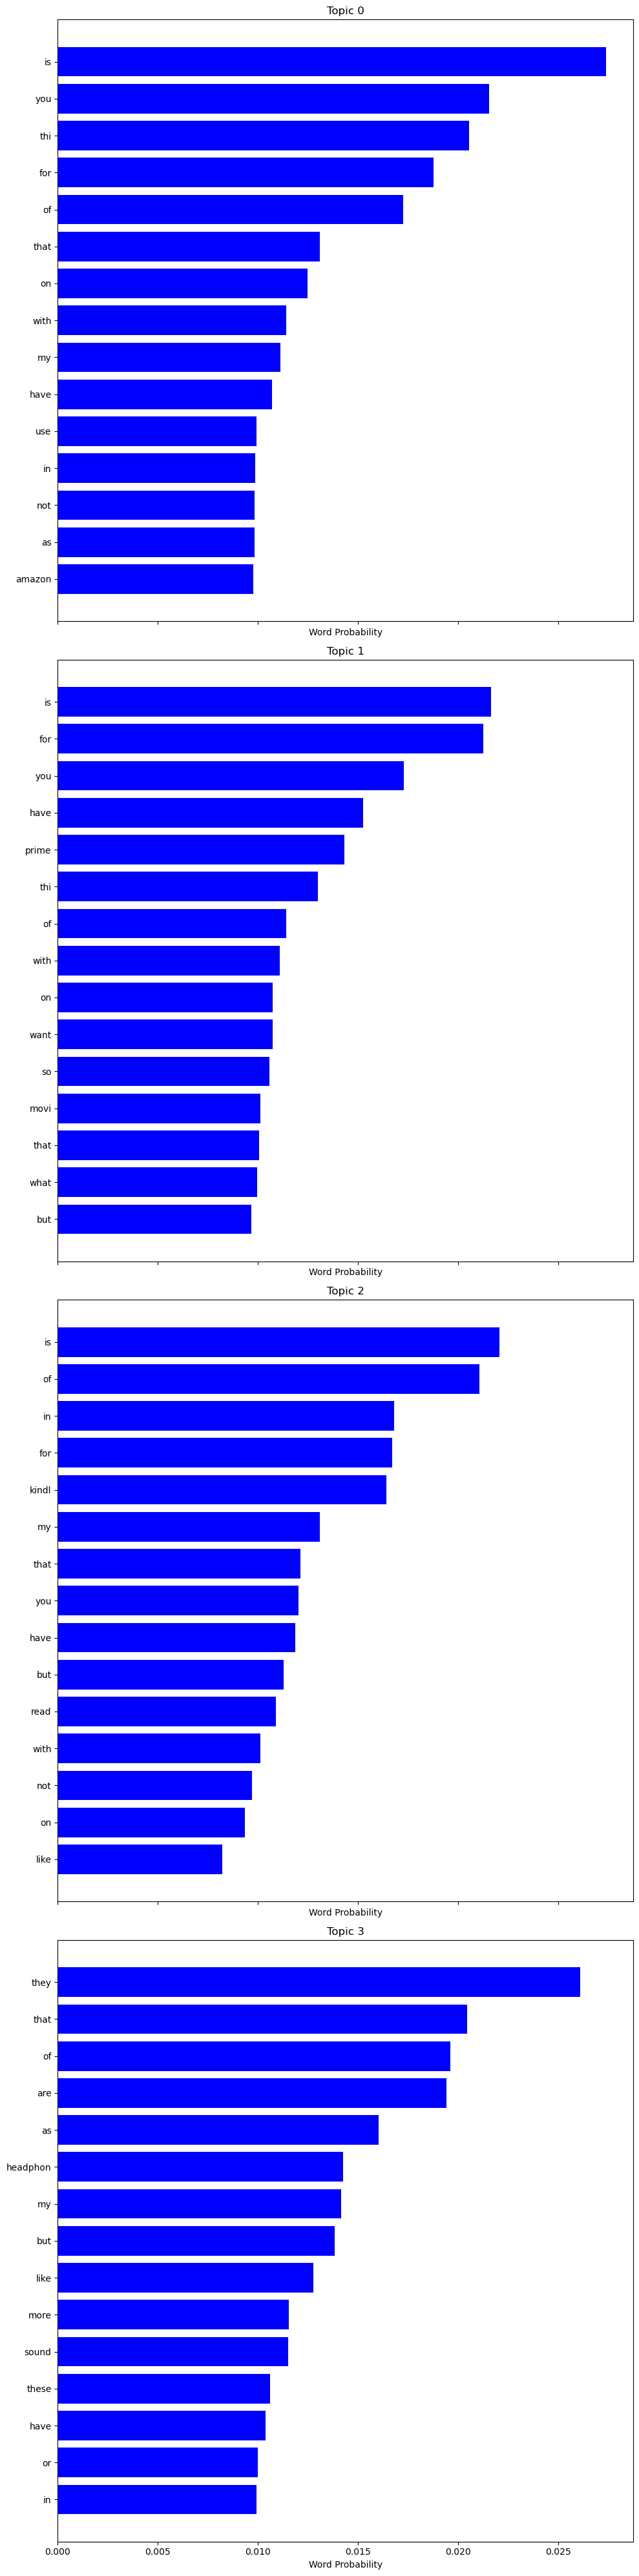

In [21]:
# Step 6: Graphically Visualize the LDA Model and Topics
def plot_lda_topics(lda_model, lda_corpus, lda_dictionary, num_topics):
    fig, axs = plt.subplots(num_topics, 1, figsize=(10, 10*num_topics), sharex=True)
    for topic_num, ax in enumerate(axs):
        topic_words = dict(lda_model.show_topic(topic_num, topn=15))
        topic_words = [word for word, _ in topic_words.items()]
        word_probs = [prob for _, prob in lda_model.show_topic(topic_num, topn=15)]
        ax.barh(topic_words, word_probs, color='blue')
        ax.invert_yaxis()
        ax.set_title(f'Topic {topic_num}')
        ax.set_xlabel('Word Probability')
    plt.tight_layout()
    plt.show()

plot_lda_topics(lda_model, lda_corpus, lda_dictionary, num_topics=topics)


In [22]:
# Step 1: Preprocess the text data for LDA
def preprocess_text_for_lda(text):
    # Tokenize the text and remove punctuation
    return [token for token in simple_preprocess(text) if token.isalpha()]

# Filter the DataFrame to include only positive sentiment
negative_sentiment_df = df[df['sentiment_category'] == 'negative']

# Apply preprocessing to the 'content' column for positive sentiment
negative_sentiment_df['processed_text'] = negative_sentiment_df['reviews.text'].astype(str).apply(preprocess_text_for_lda)

# Step 2: Create a Dictionary and Corpus for LDA
# Create a dictionary from the preprocessed text data
negative_lda_dictionary = Dictionary(negative_sentiment_df['processed_text'])

# Filter out words that occur in less than 5 documents and more than 70% of the documents
negative_lda_dictionary.filter_extremes(no_below=5, no_above=0.7)

# Create a corpus (bag of words representation) using the dictionary
negative_lda_corpus = [negative_lda_dictionary.doc2bow(text) for text in negative_sentiment_df['processed_text']]

# Step 3: Train the LDA Model
topics = 4  # adjusting the number of topics according to your preference
negative_lda = LdaModel(corpus=negative_lda_corpus, id2word=negative_lda_dictionary, num_topics=topics, passes=10, random_state=42)

# Step 4: Print the Topics
for topic_num, topic_words in negative_lda.print_topics():
    print(f'Topic {topic_num}: {topic_words}\n')


# Step 5: Calculate Coherence Score (Optional)
coherence_model = CoherenceModel(model=negative_lda, texts=negative_sentiment_df['processed_text'], dictionary=negative_lda_dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score (Negative Sentiment): {coherence_score}')

Topic 0: 0.029*"of" + 0.028*"kindl" + 0.021*"have" + 0.021*"on" + 0.019*"but" + 0.019*"thi" + 0.019*"with" + 0.018*"you" + 0.017*"as" + 0.016*"read"

Topic 1: 0.037*"thi" + 0.036*"kindl" + 0.033*"for" + 0.032*"hdx" + 0.032*"my" + 0.029*"fire" + 0.025*"hd" + 0.024*"ipad" + 0.024*"year" + 0.024*"review"

Topic 2: 0.024*"for" + 0.023*"thi" + 0.022*"not" + 0.021*"fire" + 0.019*"on" + 0.019*"with" + 0.018*"of" + 0.017*"in" + 0.017*"use" + 0.016*"remot"

Topic 3: 0.037*"of" + 0.030*"you" + 0.028*"fire" + 0.025*"thi" + 0.020*"for" + 0.017*"hd" + 0.016*"if" + 0.015*"on" + 0.015*"that" + 0.014*"with"

Coherence Score (Negative Sentiment): 0.2990484690693332


In [37]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(negative_lda, negative_lda_corpus, negative_lda_dictionary)
pyLDAvis.display(lda_display)

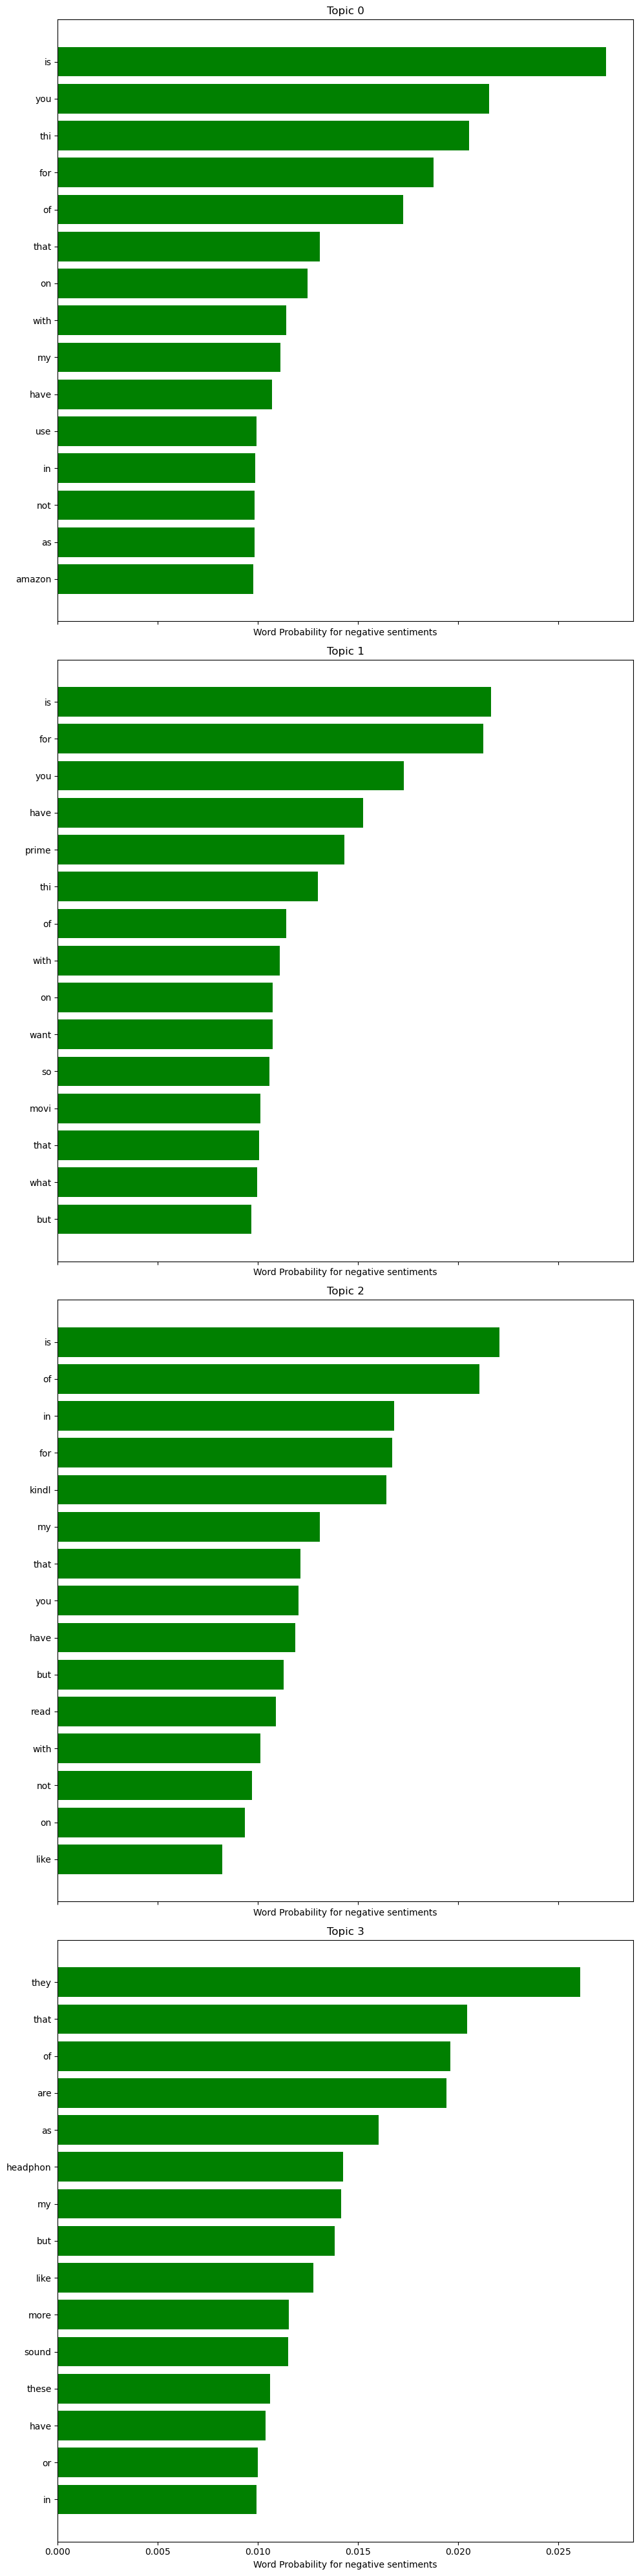

In [23]:
# Step 6: Graphically Visualize the LDA Model and Topics
def plot_lda_topics(negative_lda, negative_lda_corpus, negative_lda_dictionary, num_topics):
    fig, axs = plt.subplots(num_topics, 1, figsize=(10, 10*num_topics), sharex=True)
    for topic_num, ax in enumerate(axs):
        topic_words = dict(lda_model.show_topic(topic_num, topn=15))
        topic_words = [word for word, _ in topic_words.items()]
        word_probs = [prob for _, prob in lda_model.show_topic(topic_num, topn=15)]
        ax.barh(topic_words, word_probs, color='green')
        ax.invert_yaxis()
        ax.set_title(f'Topic {topic_num}')
        ax.set_xlabel('Word Probability for negative sentiments')
    plt.tight_layout()
    plt.show()

plot_lda_topics(negative_lda, negative_lda_corpus, negative_lda_dictionary, num_topics=topics)

In [24]:
# Step 1: Preprocess the text data for LDA
def preprocess_text_for_lda(text):
    # Tokenize the text and remove punctuation
    return [token for token in simple_preprocess(text) if token.isalpha()]

# Filter the DataFrame to include only positive sentiment
neutral_sentiment_df = df[df['sentiment_category'] == 'neutral']

# Apply preprocessing to the 'content' column for positive sentiment
neutral_sentiment_df['processed_text'] = neutral_sentiment_df['reviews.text'].astype(str).apply(preprocess_text_for_lda)

# Step 2: Create a Dictionary and Corpus for LDA
# Create a dictionary from the preprocessed text data
neutral_lda_dictionary = Dictionary(neutral_sentiment_df['processed_text'])

# Filter out words that occur in less than 5 documents and more than 70% of the documents
neutral_lda_dictionary.filter_extremes(no_below=5, no_above=0.7)

# Create a corpus (bag of words representation) using the dictionary
neutral_lda_corpus = [neutral_lda_dictionary.doc2bow(text) for text in neutral_sentiment_df['processed_text']]

# Step 3: Train the LDA Model
topics = 4  # adjusting the number of topics according to your preference
neutral_lda = LdaModel(corpus=neutral_lda_corpus, id2word=neutral_lda_dictionary, num_topics=topics, passes=10, random_state=42)

# Step 4: Print the Topics
for topic_num, topic_words in neutral_lda.print_topics():
    print(f'Topic {topic_num}: {topic_words}\n')


# Step 5: Calculate Coherence Score (Optional)
coherence_model = CoherenceModel(model=neutral_lda, texts=neutral_sentiment_df['processed_text'], dictionary=neutral_lda_dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score Neutral Sentiment: {coherence_score}')

Topic 0: 0.132*"to" + 0.084*"is" + 0.068*"it" + 0.057*"the" + 0.057*"veri" + 0.050*"you" + 0.047*"and" + 0.044*"thi" + 0.032*"of" + 0.031*"for"

Topic 1: 0.097*"ifrm" + 0.097*"document" + 0.097*"nsprefix" + 0.066*"if" + 0.065*"var" + 0.065*"getelementbyid" + 0.065*"style" + 0.033*"clipdiv" + 0.033*"getel" + 0.033*"px"

Topic 2: 0.154*"the" + 0.068*"and" + 0.058*"it" + 0.048*"on" + 0.045*"when" + 0.043*"is" + 0.035*"with" + 0.033*"remot" + 0.031*"for" + 0.025*"kindl"

Topic 3: 0.103*"to" + 0.098*"the" + 0.076*"it" + 0.061*"my" + 0.052*"had" + 0.045*"as" + 0.034*"not" + 0.034*"but" + 0.033*"thi" + 0.031*"have"

Coherence Score Neutral Sentiment: 0.6457969534072019


In [38]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(neutral_lda, neutral_lda_corpus, neutral_lda_dictionary)
pyLDAvis.display(lda_display)

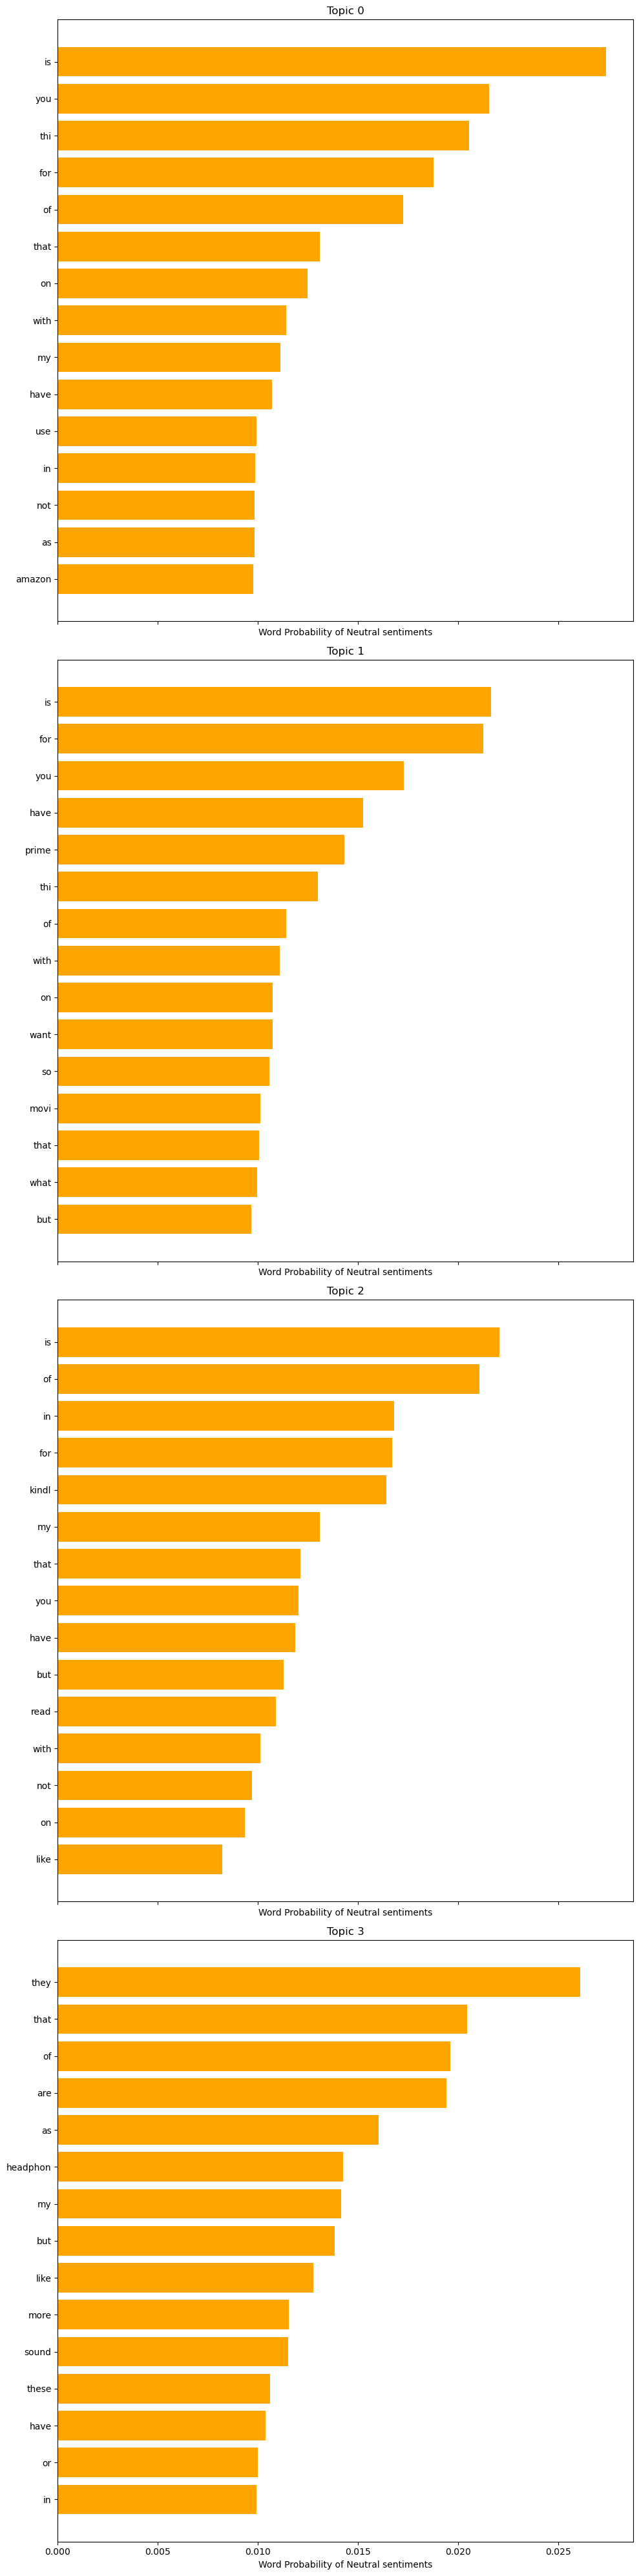

In [25]:
# Step 6: Graphically Visualize the LDA Model and Topics
def plot_lda_topics(neutral_lda, neutral_lda_corpus, neutral_lda_dictionary, num_topics):
    fig, axs = plt.subplots(num_topics, 1, figsize=(10, 10*num_topics), sharex=True)
    for topic_num, ax in enumerate(axs):
        topic_words = dict(lda_model.show_topic(topic_num, topn=15))
        topic_words = [word for word, _ in topic_words.items()]
        word_probs = [prob for _, prob in lda_model.show_topic(topic_num, topn=15)]
        ax.barh(topic_words, word_probs, color='orange')
        ax.invert_yaxis()
        ax.set_title(f'Topic {topic_num}')
        ax.set_xlabel('Word Probability of Neutral sentiments')
    plt.tight_layout()
    plt.show()

plot_lda_topics(neutral_lda, neutral_lda_corpus, neutral_lda_dictionary, num_topics=topics)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the stop words
stop_words = ["your", "list", "of", "stop", "words", "here"]

# Preprocess text data by removing stop words and short words
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: ' '.join([w for w in x if w not in stop_words])
    if isinstance(x, list)
    else ' '.join([w for w in x.split() if w not in stop_words])
)

# Additional preprocessing to handle lists of strings
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 2])
    if isinstance(x, str)
    else ' '.join([w for w in x if len(w) > 2])
)

# Initialize TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(max_features=30, ngram_range=(1, 2), stop_words="english")

# Transform the preprocessed text data using TfidfVectorizer
X_tfidf = tfidf.fit_transform(df["reviews.text"])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (1597, 30)


## SVM Classifier

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import pandas as pd

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["reviews.rating"])

# Split the data into features (X_tfidf) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Initialize Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Train the SVM model on the entire dataset
svm_model = svm_classifier.fit(X_tfidf, y_encoded)

# Calculate accuracy on the entire dataset for SVM
svm_accuracy = svm_model.score(X_tfidf, y_encoded)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.6293049467752035


In [28]:
from sklearn.metrics import precision_recall_fscore_support

# Predict the labels for the test set using SVM
svm_predictions = svm_model.predict(X_tfidf)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_encoded, svm_predictions, average='weighted')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6629647995518267
Recall: 0.6293049467752035
F1 Score: 0.5758328263495082


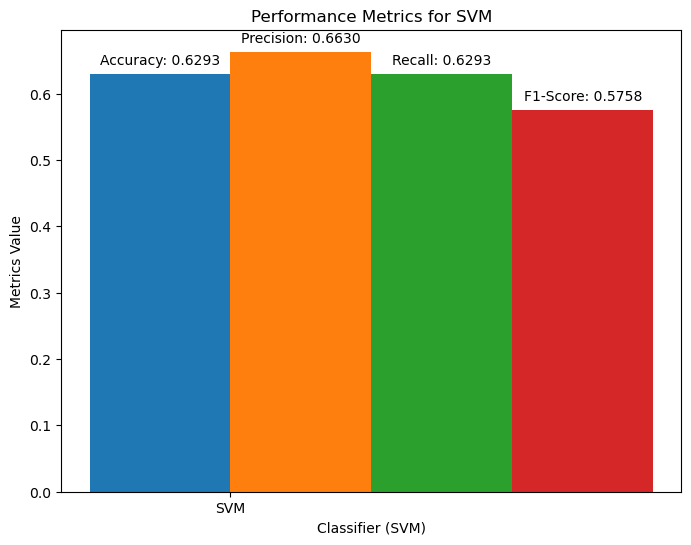

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Values for the different metrics
accuracy_values = [svm_accuracy]
precision_values = [precision]
recall_values = [recall]
f1_values = [f1]

# Labels for the classifier
classifiers = ['SVM']

# Metrics labels
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.2
bar_positions = np.arange(len(classifiers))

# Bar plots
bars_accuracy = plt.bar(bar_positions - 0.5 * bar_width, accuracy_values, width=bar_width, label='Accuracy')
bars_precision = plt.bar(bar_positions + 0.5 * bar_width, precision_values, width=bar_width, label='Precision')
bars_recall = plt.bar(bar_positions + 1.5 * bar_width, recall_values, width=bar_width, label='Recall')
bars_f1 = plt.bar(bar_positions + 2.5 * bar_width, f1_values, width=bar_width, label='F1-Score')

# Adding labels and title
plt.xlabel('Classifier (SVM)')
plt.ylabel('Metrics Value')
plt.title('Performance Metrics for SVM')
plt.xticks(bar_positions, classifiers)

# Display the scores and labels under the bars
for bars, values, metric_label in zip([bars_accuracy, bars_precision, bars_recall, bars_f1],
                                      [accuracy_values, precision_values, recall_values, f1_values],
                                      metrics_labels):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{metric_label}: {value:.4f}', ha='center', va='bottom')

# Display the plot
plt.show()


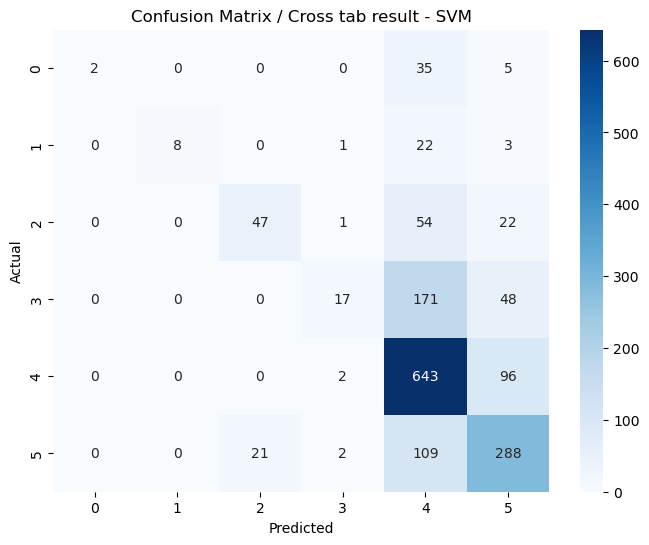

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the entire dataset using SVM
svmpredict = svm_model.predict(X_tfidf)

# Create a confusion matrix using pd.crosstab
conf_matrix = pd.crosstab(y_encoded, svmpredict, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix / Cross tab result - SVM')

# Show the plot
plt.show()


## Gradient Boost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the Gradient Boosting model on the entire dataset
gb_model = gb_classifier.fit(X_tfidf, y_encoded)

# Calculate accuracy on the entire dataset for Gradient Boosting
gb_accuracy = gb_model.score(X_tfidf, y_encoded)
print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.7526612398246713


In [32]:
from sklearn.metrics import precision_recall_fscore_support

# Predict the labels for the entire dataset using Gradient Boosting
gb_predictions = gb_model.predict(X_tfidf)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_encoded, gb_predictions, average='weighted')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7712544999790816
Recall: 0.7526612398246713
F1 Score: 0.7413684794767286


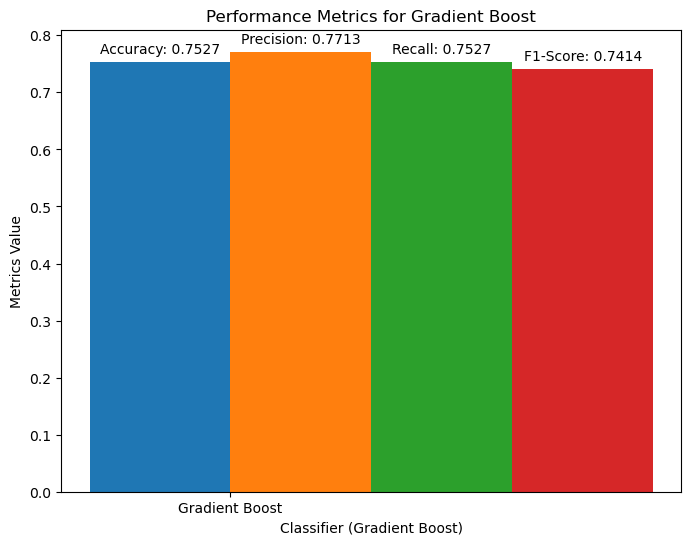

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Values for the different metrics
accuracy_values = [gb_accuracy]
precision_values = [precision]
recall_values = [recall]
f1_values = [f1]

# Labels for the classifier
classifiers = ['Gradient Boost']

# Metrics labels
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.2
bar_positions = np.arange(len(classifiers))

# Bar plots
bars_accuracy = plt.bar(bar_positions - 0.5 * bar_width, accuracy_values, width=bar_width, label='Accuracy')
bars_precision = plt.bar(bar_positions + 0.5 * bar_width, precision_values, width=bar_width, label='Precision')
bars_recall = plt.bar(bar_positions + 1.5 * bar_width, recall_values, width=bar_width, label='Recall')
bars_f1 = plt.bar(bar_positions + 2.5 * bar_width, f1_values, width=bar_width, label='F1-Score')

# Adding labels and title
plt.xlabel('Classifier (Gradient Boost)')
plt.ylabel('Metrics Value')
plt.title('Performance Metrics for Gradient Boost')
plt.xticks(bar_positions, classifiers)

# Display the scores and labels under the bars
for bars, values, metric_label in zip([bars_accuracy, bars_precision, bars_recall, bars_f1],
                                      [accuracy_values, precision_values, recall_values, f1_values],
                                      metrics_labels):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{metric_label}: {value:.4f}', ha='center', va='bottom')

# Display the plot
plt.show()


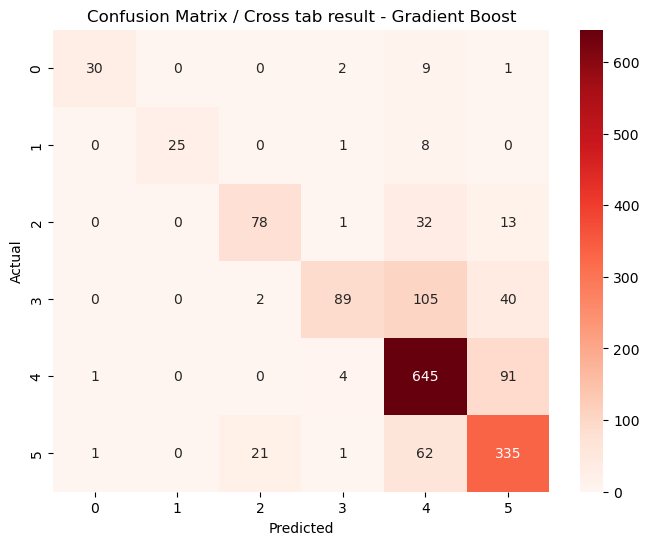

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the entire dataset using SVM
gbpredict = gb_model.predict(X_tfidf)

# Create a confusion matrix using pd.crosstab
conf_matrix = pd.crosstab(y_encoded, gbpredict, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix / Cross tab result - Gradient Boost')

# Show the plot
plt.show()


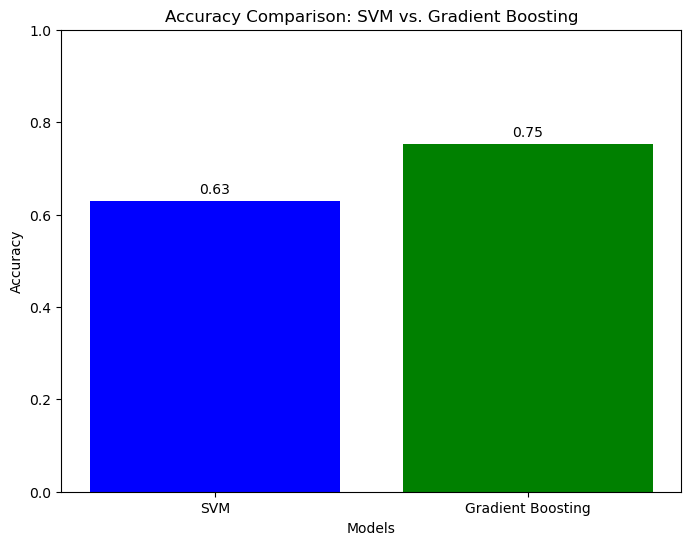

In [35]:
import matplotlib.pyplot as plt

# Accuracy scores for SVM and Gradient Boosting
accuracy_scores = [svm_accuracy, gb_accuracy]
models = ['SVM', 'Gradient Boosting']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM vs. Gradient Boosting')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage (0 to 1)

# Add accuracy scores above the bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.show()
